**Import:**
Import and load the dataset required libraries to perform the sentiment analysis tasks.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# Load the IMDB Reviews dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)


17464789/17464789 [==============================] - 1s 0us/step


This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode the pad token.

**x_train, x_test:** lists of sequences, which are lists of indexes (integers). If the num_words argument was specific, the maximum possible index value is num_words - 1. If the maxlen argument was specified, the largest possible sequence length is maxlen.

**y_train, y_test:** lists of integer labels (1 or 0).

**Padding:** Padding is a common technique used in natural language processing (NLP) to ensure all input sequences have the same length. This is often necessary because many NLP models, such as neural networks, require fixed-length input sequences.

In [3]:
# Pad the sequences to have equal length
max_len = 500
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

**Build the Model**

In [4]:
# Set the input and output dimensions
input_dim = 10000
output_dim = 1
# Create the input layer
inputs = tf.keras.Input(shape=(None,), dtype="int32")

# Create the model
x = tf.keras.layers.Embedding(input_dim, 128)(inputs)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
outputs = tf.keras.layers.Dense(output_dim, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])


**Train**

In [5]:
# Train the model
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 1365s 2s/step - loss: 0.4145 - accuracy: 0.8118 - val_loss: 0.6733 - val_accuracy: 0.6890
Epoch 2/5
782/782 [==============================] - 1333s 2s/step - loss: 0.3234 - accuracy: 0.8643 - val_loss: 0.3172 - val_accuracy: 0.8664
Epoch 3/5
782/782 [==============================] - 1326s 2s/step - loss: 0.2145 - accuracy: 0.9191 - val_loss: 0.3087 - val_accuracy: 0.8705
Epoch 4/5
782/782 [==============================] - 1291s 2s/step - loss: 0.1674 - accuracy: 0.9378 - val_loss: 0.2824 - val_accuracy: 0.8882
Epoch 5/5
782/782 [==============================] - 1286s 2s/step - loss: 0.1353 - accuracy: 0.9528 - val_loss: 0.3047 - val_accuracy: 0.8878


**Accuracy**

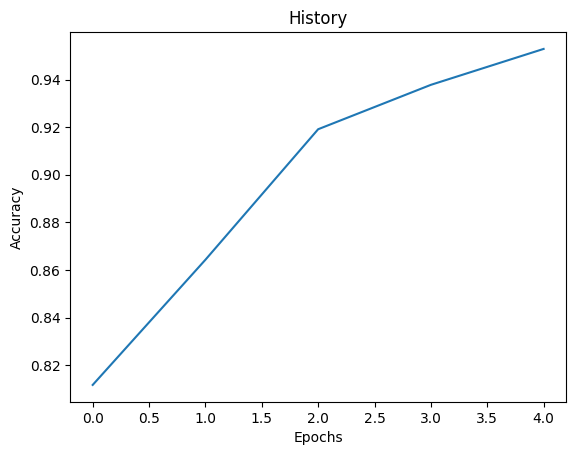

In [6]:
# Plot the accuracy
fig = plt.plot(history.history['accuracy'])
title = plt.title("History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Accuracy")

**Predict**

In [35]:
predictions = model.predict(x_test[:4])
for pred in predictions:
    print(np.argmax(pred))

1/1 [==============================] - 0s 147ms/step
0
0
0
0
